In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import os
num_steps = 100
sns.set_theme(style="whitegrid")
sns.color_palette("Set2")
plt.rcParams['figure.figsize'] = (25.0, 10.0)
splits = 8

In [14]:
def configure_dataframe(splits, num_samples, configuration_format="beliefs_{}_{}_{}"):
    filename = configuration_format.format(splits, num_samples, num_steps)
    filepath = os.path.join(str(Path.home()), "master_thesis/code/hythe-src/beliefs_data", filename)
    return pd.read_pickle(filepath)

def plot_beliefs(df):
    agents = df["Agent"].unique()
    for agent in agents:
        plt.figure()
        plt.ylim([0.0, 0.01])
        df_agent = df[df["Agent"] == agent]
        sns.lineplot(x="Step", y="Beliefs", data=df_agent, hue="HyNum", legend="full")
    return

def plot_frames(df1, df2):
    agents = df1.Agent.unique()
    for agent in [3.0]:
        plt.figure()
#         plt.ylim([0.0, 0.01])
        df1_agent = df1[df1["Agent"] == agent]
        df2_agent = df2[df2["Agent"] == agent]
        print("Beliefs for agent", agent)
        sns.lineplot(x="Step", y="Beliefs", data=df1_agent, linewidth=4, alpha=0.5, label='W/o Discretization', legend="full", palette=sns.color_palette("Blues", n_colors=1))
#         plt.figure()
        sns.lineplot(x="Step", y="Beliefs", data=df2_agent, linewidth=4, alpha=0.5, label='W/ Discretization', legend="full", palette=sns.color_palette("Reds", n_colors=1))
        plt.xlabel("Iterations/Steps", fontsize=35)
        plt.ylabel("Hypothesis Beliefs", fontsize=35)
        plt.xticks(fontsize=35)
        plt.yticks(fontsize=35)
        plt.legend(fontsize=30)
        plt.savefig('discretization_comparison.svg')
#         break
    return

   Step  Action  Agent   Beliefs  HyNum
0   1.0     5.0    1.0  0.000206    0.0
1   1.0     5.0    1.0  0.000206    1.0
2   1.0     5.0    1.0  0.000206    2.0
3   1.0     5.0    1.0  0.000206    3.0
4   1.0     5.0    1.0  0.000206    4.0
5   1.0     5.0    1.0  0.000206    5.0
6   1.0     5.0    1.0  0.000206    6.0
7   1.0     5.0    1.0  0.998561    7.0
8   1.0     5.0    0.0  0.000207    0.0
9   1.0     5.0    0.0  0.000207    1.0
   Step  Action  Agent   Beliefs  HyNum
0   1.0     5.0    1.0  0.142857    0.0
1   1.0     5.0    1.0  0.142857    1.0
2   1.0     5.0    1.0  0.142857    2.0
3   1.0     5.0    1.0  0.142857    3.0
4   1.0     5.0    1.0  0.142857    4.0
5   1.0     5.0    1.0  0.142857    5.0
6   1.0     5.0    1.0  0.142857    6.0
7   1.0     5.0    1.0  1.000000    7.0
8   1.0     5.0    0.0  0.142857    0.0
9   1.0     5.0    0.0  0.142857    1.0
Beliefs for agent 3.0


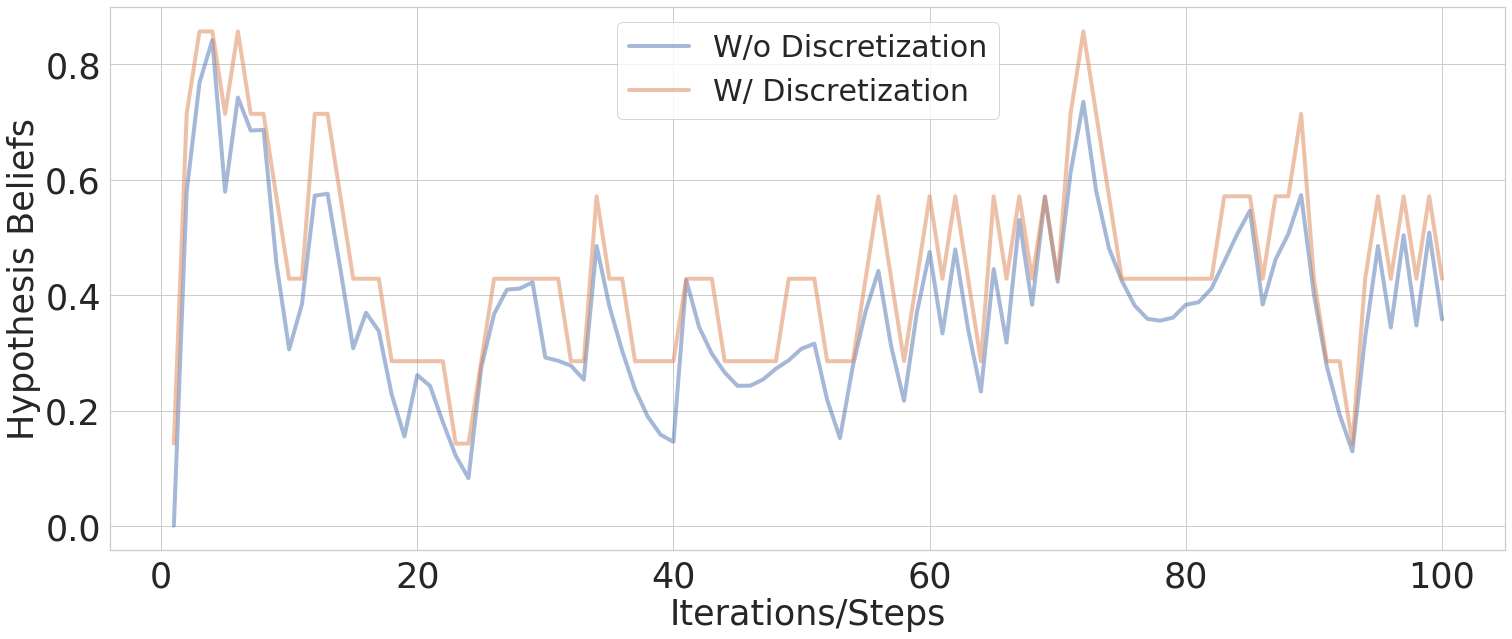

In [15]:
# df0 = configure_dataframe(8, 1)
# # plot_beliefs(df0)
# df01 = configure_dataframe(8, 100)
# # plot_beliefs(df01)

# beliefs_8_1000_100switch
df1 = configure_dataframe(8, 1000, configuration_format="orig_beliefs_{}_{}_{}switch_discretize")
print(df1.head(10))
# beliefs_8_1000_100switch_threshold
df2 = configure_dataframe(8, 1000, configuration_format="beliefs_{}_{}_{}switch_discretize")
print(df2.head(10))

plot_frames(df1[df1["HyNum"] == 6.0], df2[df2["HyNum"] == 6.0])
# plot_frames(df1, df2)

   Step  Action  Agent   Beliefs  HyNum
0   1.0     5.0    1.0  0.000206    0.0
1   1.0     5.0    1.0  0.000206    1.0
2   1.0     5.0    1.0  0.000206    2.0
3   1.0     5.0    1.0  0.000206    3.0
4   1.0     5.0    1.0  0.000206    4.0
5   1.0     5.0    1.0  0.000206    5.0
6   1.0     5.0    1.0  0.000206    6.0
7   1.0     5.0    1.0  0.998561    7.0
8   1.0     5.0    0.0  0.000207    0.0
9   1.0     5.0    0.0  0.000207    1.0
   Step  Action  Agent   Beliefs  HyNum
0   1.0     5.0    1.0  0.000000    0.0
1   1.0     5.0    1.0  0.000000    1.0
2   1.0     5.0    1.0  0.000000    2.0
3   1.0     5.0    1.0  0.000000    3.0
4   1.0     5.0    1.0  0.000000    4.0
5   1.0     5.0    1.0  0.000000    5.0
6   1.0     5.0    1.0  0.000000    6.0
7   1.0     5.0    1.0  0.998561    7.0
8   1.0     5.0    0.0  0.000000    0.0
9   1.0     5.0    0.0  0.000000    1.0
Beliefs for agent 1.0


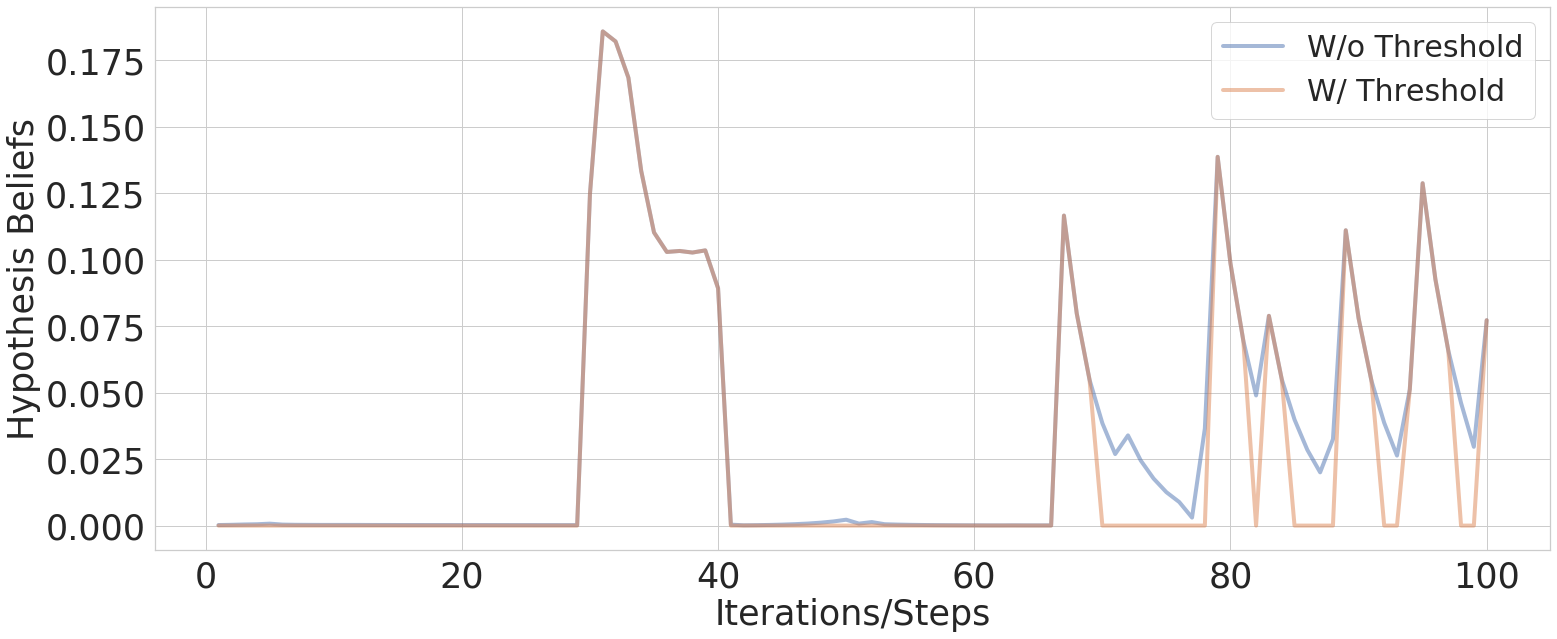

In [13]:
# df0 = configure_dataframe(8, 1)
# # plot_beliefs(df0)
# df01 = configure_dataframe(8, 100)
# # plot_beliefs(df01)

# beliefs_8_1000_100switch
df1 = configure_dataframe(8, 1000, configuration_format="orig_beliefs_{}_{}_{}switch_threshold")
print(df1.head(10))
# beliefs_8_1000_100switch_threshold
df2 = configure_dataframe(8, 1000, configuration_format="beliefs_{}_{}_{}switch_threshold")
print(df2.head(10))

plot_frames(df1[df1["HyNum"] == 6.0], df2[df2["HyNum"] == 6.0])

In [16]:
df1 = configure_dataframe(8, 500)
agents = df1.Agent.unique()

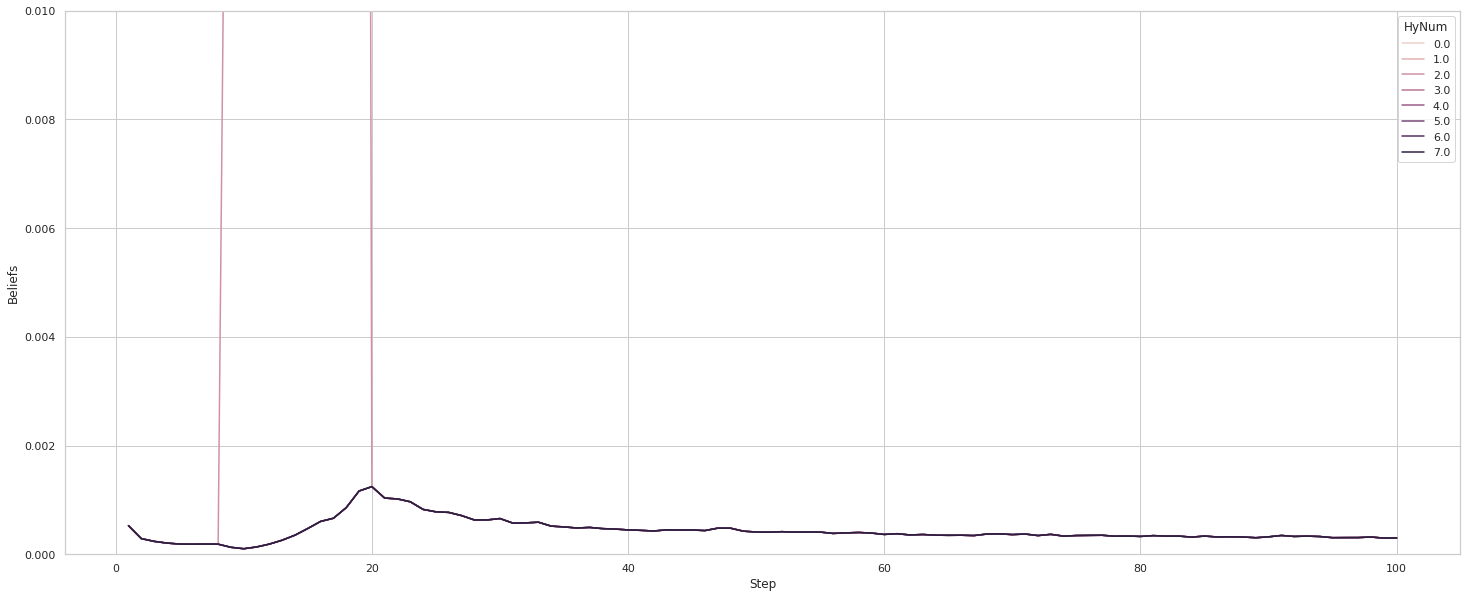

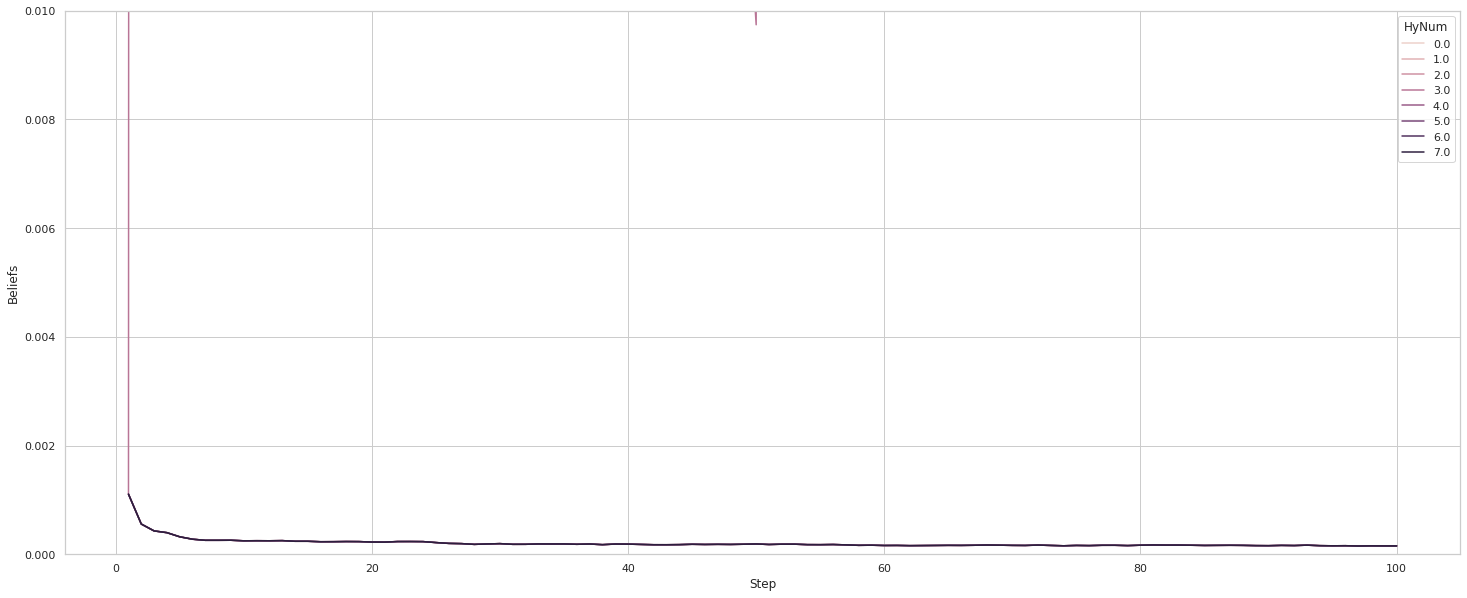

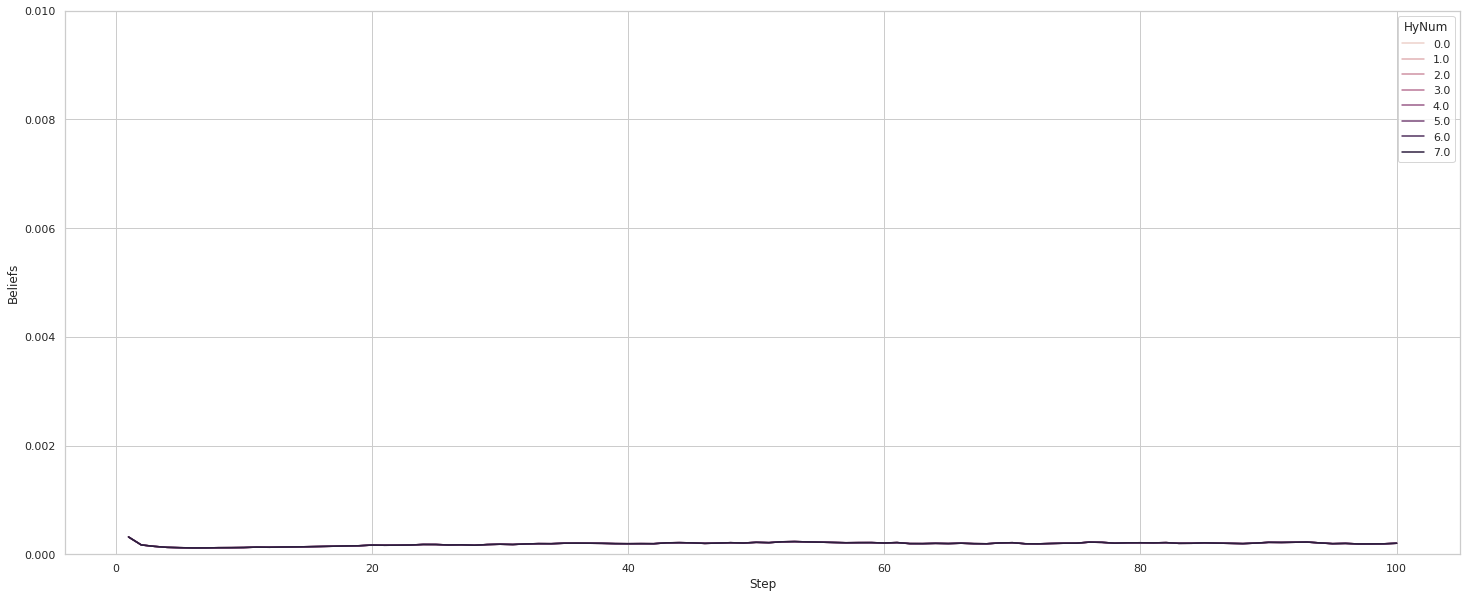

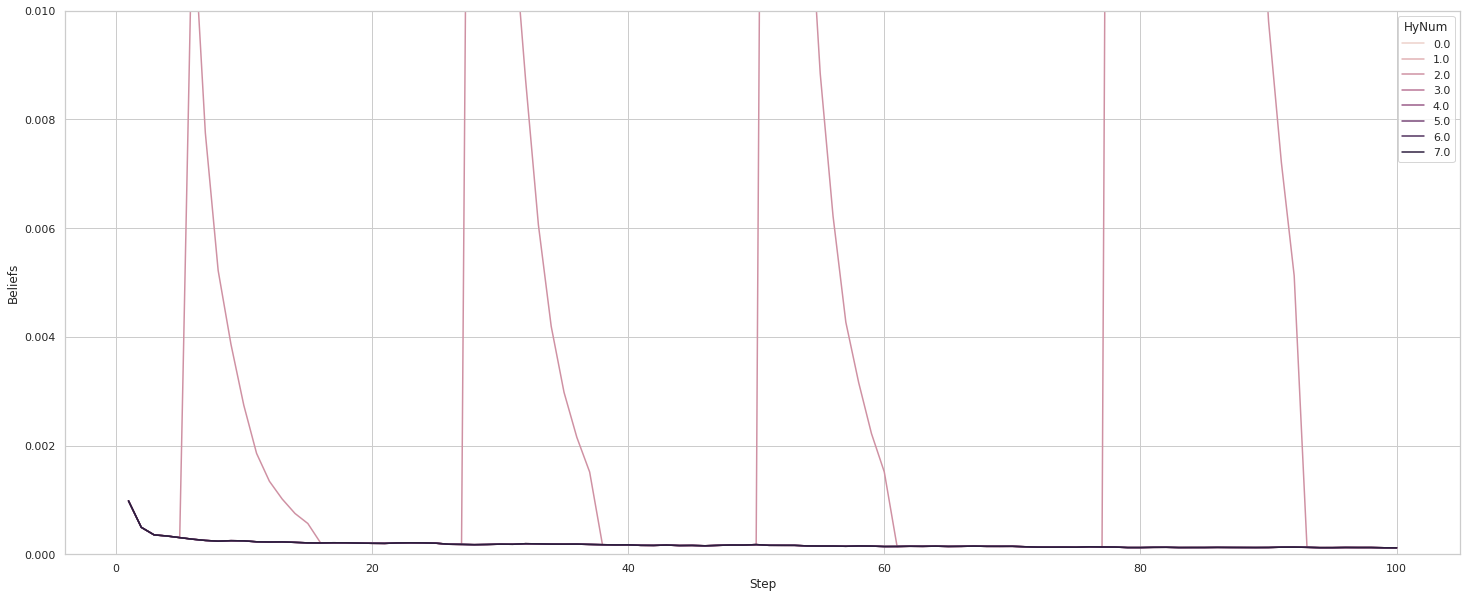

In [17]:
plot_beliefs(df1)

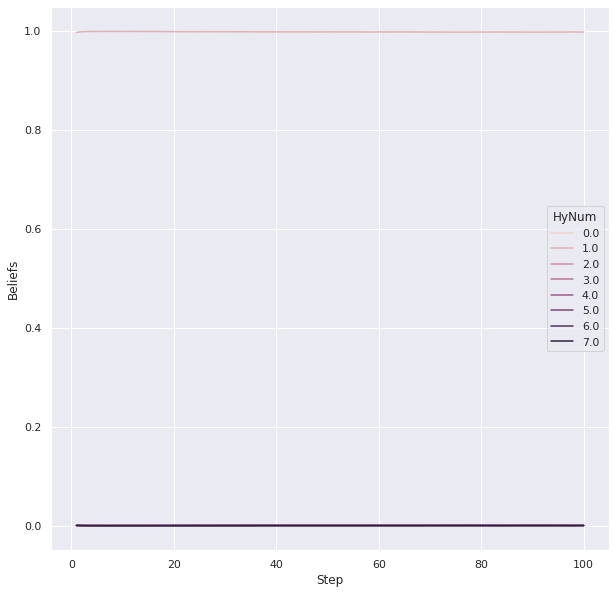

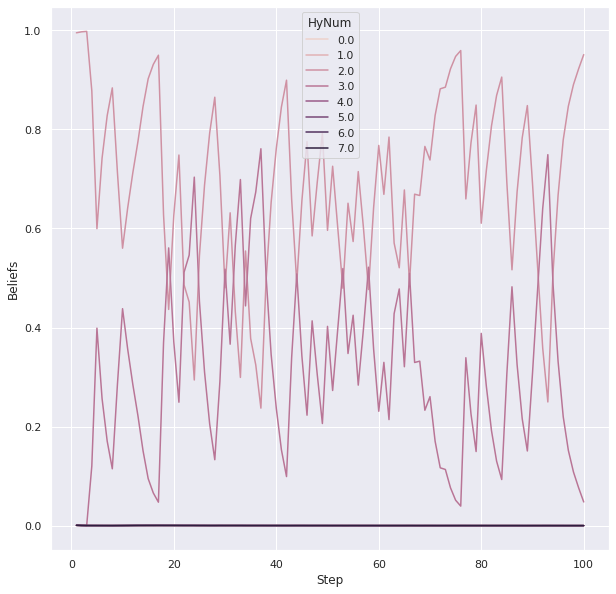

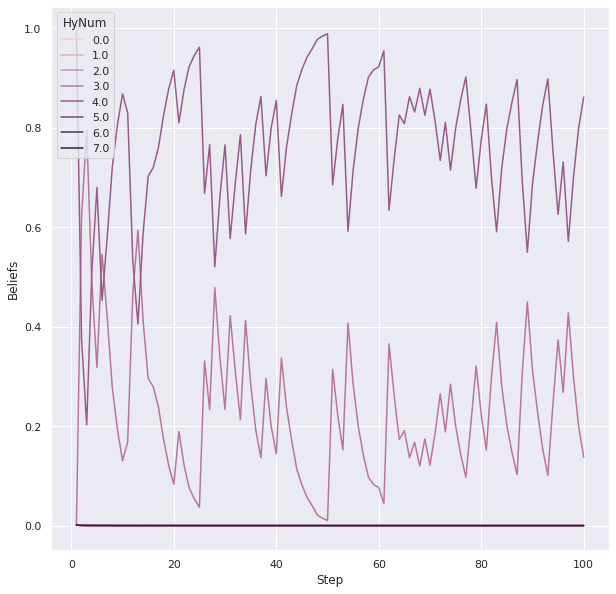

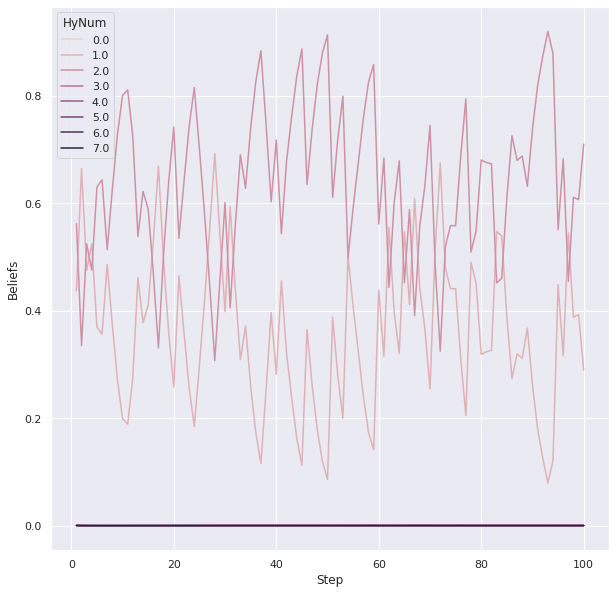

In [6]:
df2 = configure_dataframe(8, 1000)
plot_beliefs(df2)

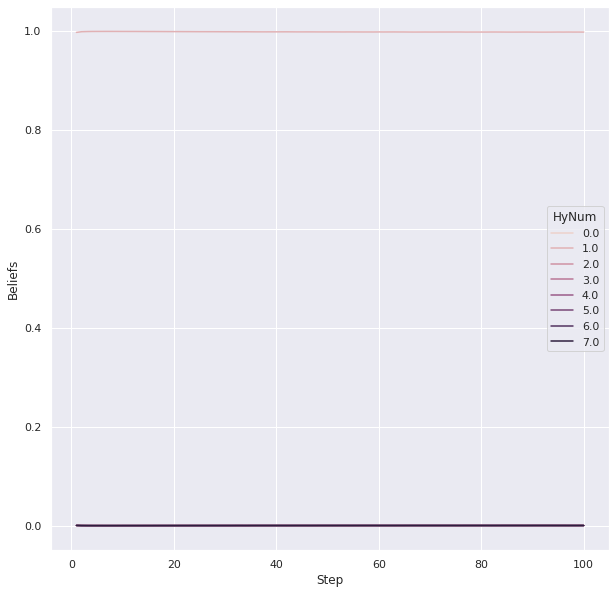

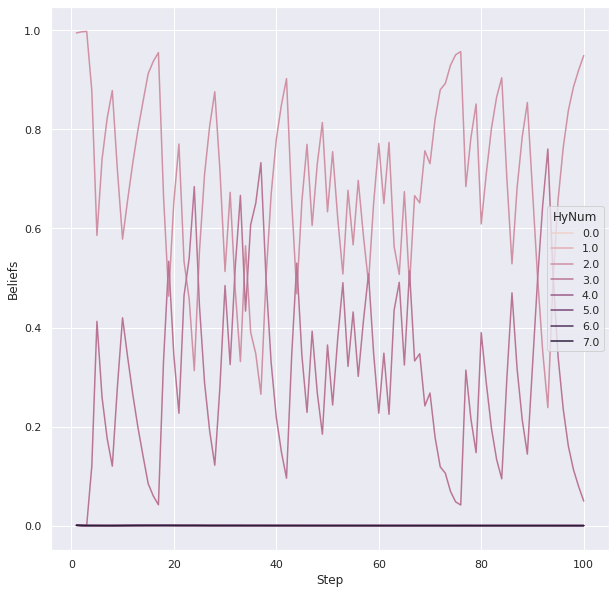

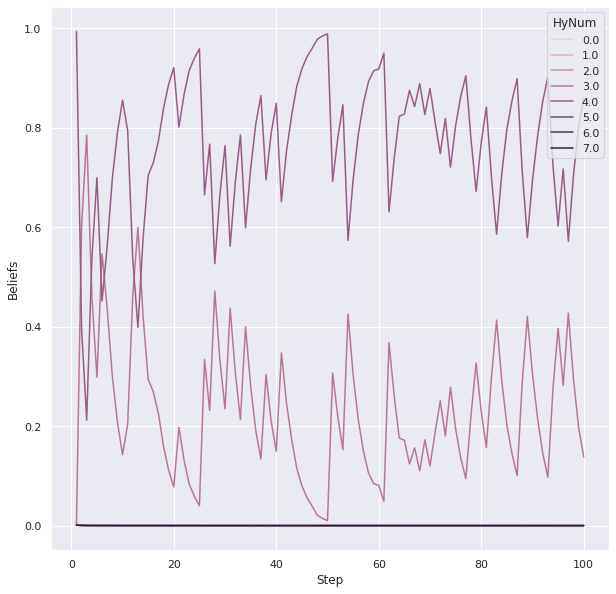

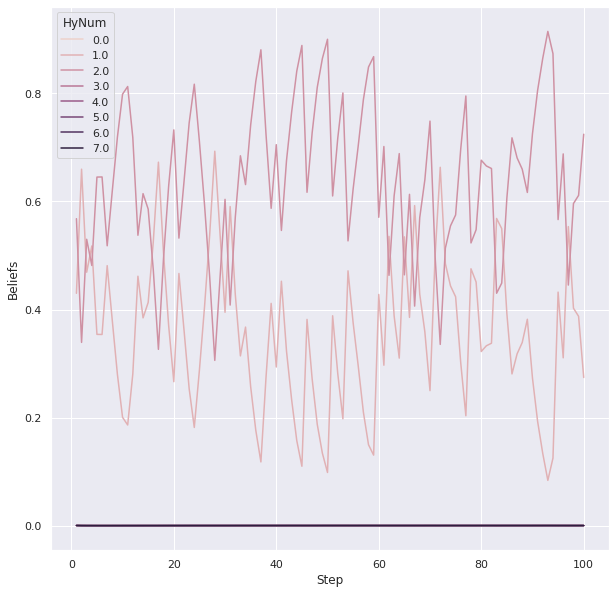

In [7]:
df3 = configure_dataframe(8, 5000)
plot_beliefs(df3)

In [8]:
df4 = configure_dataframe(8, 10000)
# plot_beliefs(df4)

In [9]:
df5 = configure_dataframe(8, 100000)
# plot_beliefs(df5)

In [ ]:
plot_frames(df01, df1)

In [ ]:
plot_frames(df1, df3)

Beliefs for agent 1.0
Beliefs for agent 0.0
Beliefs for agent 2.0
Beliefs for agent 3.0


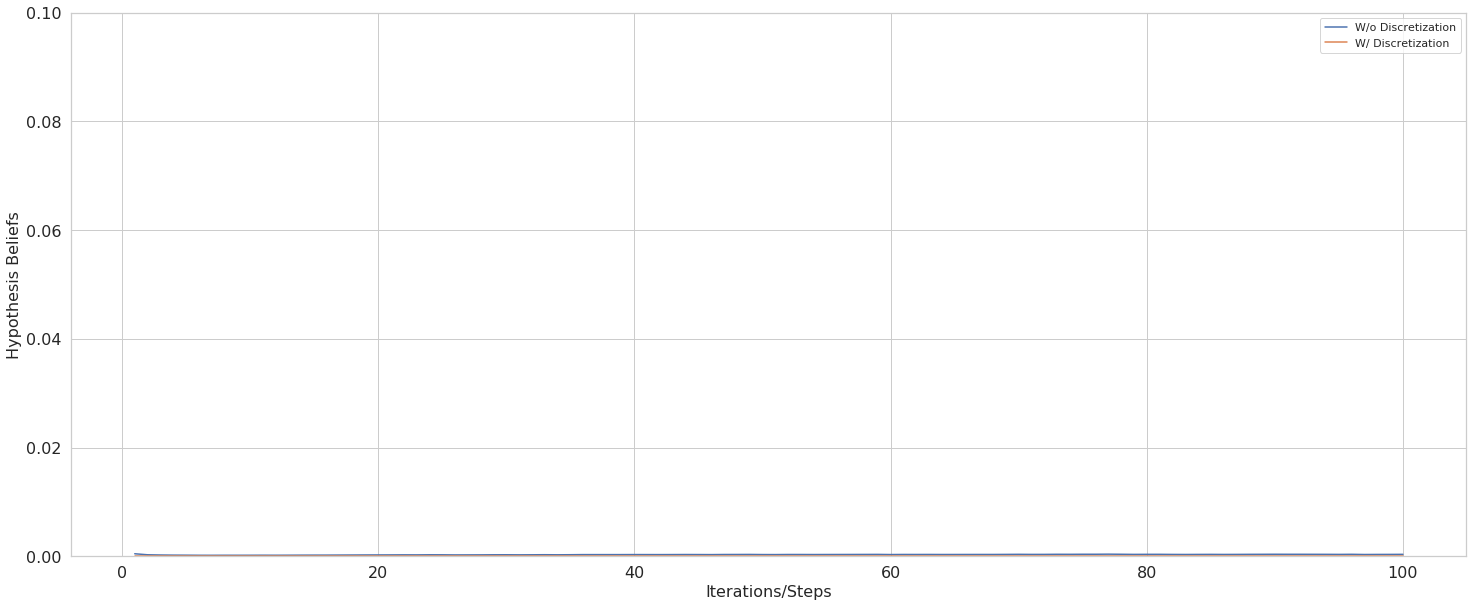

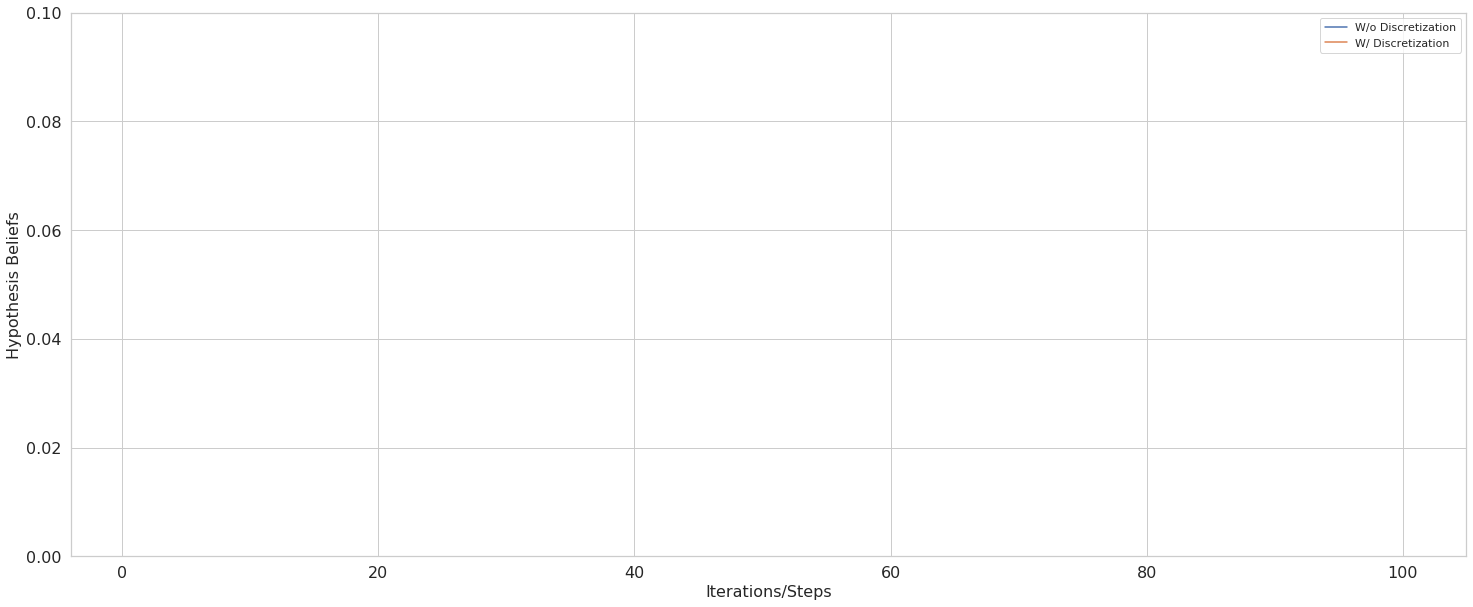

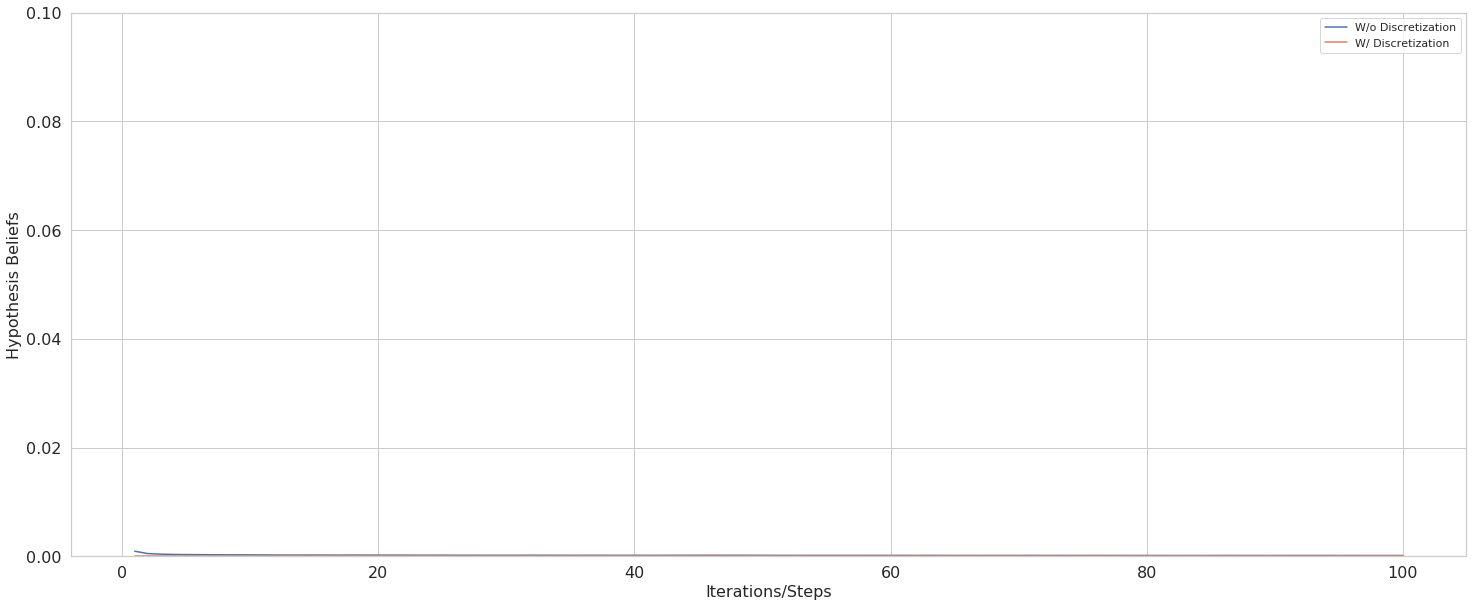

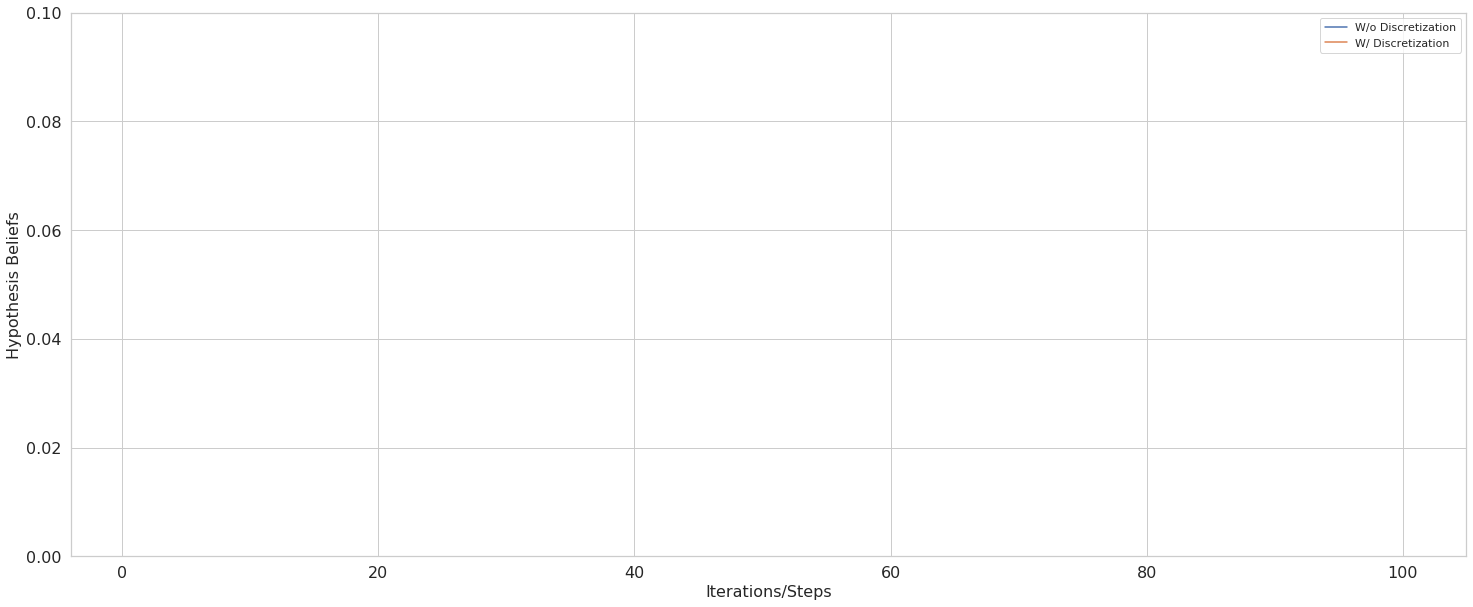

In [24]:
df1000 = configure_dataframe(8, 1000, "beliefs_{}_{}_{}")
df1000_switch = configure_dataframe(8, 1000, "beliefs_{}_{}_{}switch_threshold_discretize")
# plot_beliefs(df1000)
df1000_th_di = configure_dataframe(8, 1000, "beliefs_{}_{}_{}_threshold_discretize")
# plot_beliefs(df1000_th_di)
# print(df1000.loc[df1000['HyNum'] == 2.0])
df1000 = df1000.loc[df1000['HyNum'] == 2.0]
# # print(df1000)
df1000_th_di = df1000_th_di.loc[df1000_th_di['HyNum'] == 2.0]
plot_frames(df1000, df1000_th_di)

In [29]:
df1000 = configure_dataframe(8, 1000, "beliefs_{}_{}_{}")
df1000_switch = configure_dataframe(8, 1000, "beliefs_{}_{}_{}switch_threshold_discretize")
# plot_beliefs(df1000)
df1000_th = configure_dataframe(8, 1000, "beliefs_{}_{}_{}_threshold")
print(df1000_th, df1000_switch)
# plot_beliefs(df1000_th_di)
# print(df1000.loc[df1000['HyNum'] == 2.0])
# df1000 = df1000.loc[df1000['HyNum'] == 2.0]
# # print(df1000)
# df1000_th_di = df1000_th_di.loc[df1000_th_di['HyNum'] == 2.0]
# plot_frames(df1000, df1000_th_di)

       Step  Action  Agent   Beliefs  HyNum
0       1.0     5.0    1.0  0.000000    0.0
1       1.0     5.0    1.0  0.996723    1.0
2       1.0     5.0    1.0  0.000000    2.0
3       1.0     5.0    1.0  0.000000    3.0
4       1.0     5.0    1.0  0.000000    4.0
5       1.0     5.0    1.0  0.000000    5.0
6       1.0     5.0    1.0  0.000000    6.0
7       1.0     5.0    1.0  0.000000    7.0
8       1.0     5.0    0.0  0.000000    0.0
9       1.0     5.0    0.0  0.000000    1.0
10      1.0     5.0    0.0  0.994978    2.0
11      1.0     5.0    0.0  0.000000    3.0
12      1.0     5.0    0.0  0.000000    4.0
13      1.0     5.0    0.0  0.000000    5.0
14      1.0     5.0    0.0  0.000000    6.0
15      1.0     5.0    0.0  0.000000    7.0
16      1.0     5.0    2.0  0.000000    0.0
17      1.0     5.0    2.0  0.000000    1.0
18      1.0     5.0    2.0  0.000000    2.0
19      1.0     5.0    2.0  0.000000    3.0
20      1.0     5.0    2.0  0.993427    4.0
21      1.0     5.0    2.0  0.00